by Rajrishi

# Data description

The ministry of water of an African country has made a data set of pumps 
installed in various places in the country to serve the water for their countrymen. It is a 
tedious and expensive task to maintain these pumps. This data set contains information 
such as the kind of pump, when it was installed, and how it is managed. Can you predict 
which pumps require repairs and which are not functional by using the given data set? A 
smart understanding of water point failure can improve maintenance operations and ensure 
that clean and safe water is available to these communities. Experiment with a few methods 
such as tree based methods, bagging, boosting method, support vector machine etc. and 
comment on the suitability of the method to predict the classes. Before implementing any 
model, visualize the data and comment on the data statistics.

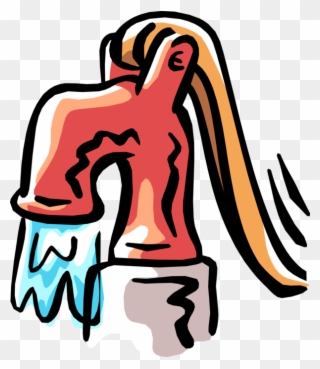

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.gridspec as gridspec
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

# Importing and checking data

In [2]:
data=pd.read_csv(r"C:\Users\Admin\Desktop\data for data analysis\assignment 2 ee769\Train.csv")
df=pd.DataFrame(data)
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7411,7.0,2013-03-20,Germany Republi,1203,CES,37.228664,-3.256505,Kwa Abdalla,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,18014,0.0,2011-02-21,Cdtf,1409,CDTF,34.615481,-9.972601,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,26103,0.0,2013-01-04,Government Of Tanzania,1572,DWE,36.658778,-3.321529,Kwa Loishiye,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
3,31140,0.0,2011-04-03,District Council,0,District Council,33.628025,-8.860795,Mwanzechele,0,...,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional
4,12286,300.0,2013-03-08,District Council,1283,District Council,37.655509,-3.669777,Kwa Kidaya,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [3]:
df.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
44545,43878,0.0,2013-01-23,World Vision,0,TAWASA,32.383715,-3.457624,Imalabuluhi,0,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
44546,50718,0.0,2011-07-25,Ded,0,DED,31.615509,-2.738682,Ilyamchele Center,0,...,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump,non functional
44547,67177,0.0,2013-02-23,Government Of Tanzania,969,Government,35.134412,-10.676062,Kwa Mzee Maondo,0,...,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe,functional
44548,2744,200.0,2013-03-26,Adra,1269,ADRA/Government,37.886287,-4.390882,Miembeni,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
44549,10262,0.0,2013-01-26,World Vision,0,Consulting Engineer,32.976560,-4.262149,Itunda A Mkwajuni,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,44550.0,37192.623681,21399.827198,1.000000,18723.250000,37183.500000,55647.500000,7.424700e+04
amount_tsh,44550.0,307.623224,2402.742799,0.000000,0.000000,0.000000,20.000000,1.700000e+05
gps_height,44550.0,665.490774,693.653179,-90.000000,0.000000,363.000000,1318.000000,2.770000e+03
longitude,44550.0,34.084084,6.555924,0.000000,33.105585,34.905600,37.176859,4.034519e+01
latitude,44550.0,-5.721980,2.948828,-11.648378,-8.574241,-5.045611,-3.327795,-2.000000e-08
num_private,44550.0,0.521549,13.835868,0.000000,0.000000,0.000000,0.000000,1.776000e+03
region_code,44550.0,15.338563,17.672144,1.000000,5.000000,12.000000,17.000000,9.900000e+01
district_code,44550.0,5.678967,9.724205,0.000000,2.000000,3.000000,5.000000,8.000000e+01
population,44550.0,179.112750,478.995645,0.000000,0.000000,25.000000,210.000000,3.050000e+04
construction_year,44550.0,1295.782155,953.183961,0.000000,0.000000,1985.000000,2004.000000,2.013000e+03


In [5]:
df.shape

(44550, 41)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44550 non-null  int64  
 1   amount_tsh             44550 non-null  float64
 2   date_recorded          44550 non-null  object 
 3   funder                 41757 non-null  object 
 4   gps_height             44550 non-null  int64  
 5   installer              41743 non-null  object 
 6   longitude              44550 non-null  float64
 7   latitude               44550 non-null  float64
 8   wpt_name               44550 non-null  object 
 9   num_private            44550 non-null  int64  
 10  basin                  44550 non-null  object 
 11  subvillage             44263 non-null  object 
 12  region                 44550 non-null  object 
 13  region_code            44550 non-null  int64  
 14  district_code          44550 non-null  int64  
 15  lg

<AxesSubplot:>

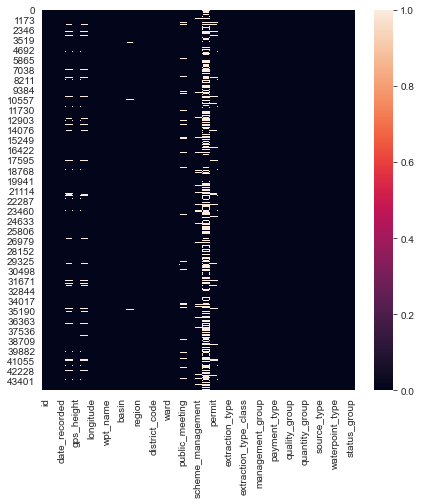

In [7]:
#visualizing the missing values
plt.figure(figsize=(7,7))
sns.heatmap(df.isnull())

***observation***

it's visible that there are missing values in some of the features.We might need to drop the columns if there are too many missing values
and if the feature is not of much importance to the target column

In [8]:
#copying my data in another variable incase of future needs
df_raw=df.copy()

# Exploratory data analysis

In [9]:
# the id column is not important hence it's better to drop the column
df=df.drop("id",axis=1)
df.head(1)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7.0,2013-03-20,Germany Republi,1203,CES,37.228664,-3.256505,Kwa Abdalla,0,Pangani,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [10]:
#differentiating the categorical and numerical features
def feature_types(df):
    categ=[]
    numer=[]
    for c in df.columns:
        if df[c].dtype=="object":categ.append(c)
        else: numer.append(c) 
    return categ,numer       
categ,numer=feature_types(df)

print("CATEGORICAL FEATURES")
print(categ)
print("-----------------------")
print("NUMERICAL FEATURES")
print(numer)


CATEGORICAL FEATURES
['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']
-----------------------
NUMERICAL FEATURES
['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year']


 ***observation***
    categorical variables are much more than thatt of the numerical features

Since there are too many features hence it is better if we identify the most important features and than visualize their distribution and draw insights from the data 

***Analyzing the categorical data***

In [11]:
#identifying the categorical features out of the "object type features"
categ_imp=[]
categ_unimp=[]
for i in categ:
    if(len(df[i].unique())<=22):
        categ_imp.append(i)
    else:categ_unimp.append(i)

print("Total categorical variables:::",len(categ_imp))
print("------------------------------")
print(categ_imp)


    

Total categorical variables::: 23
------------------------------
['basin', 'region', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']


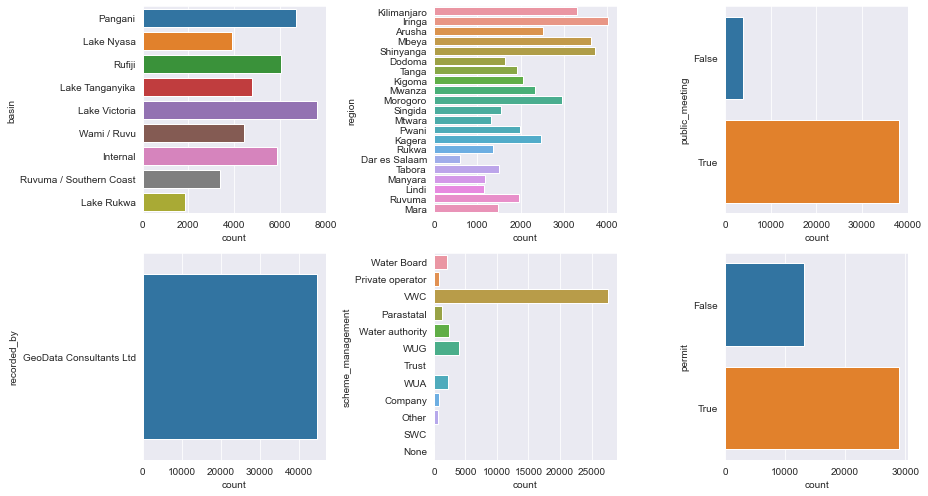

In [12]:
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(13,7))
index=0
ax=ax.flatten()

for i in categ_imp[0:6]:
    sns.countplot(y=i,data=df,ax=ax[index])
    index+=1
    
plt.tight_layout() 


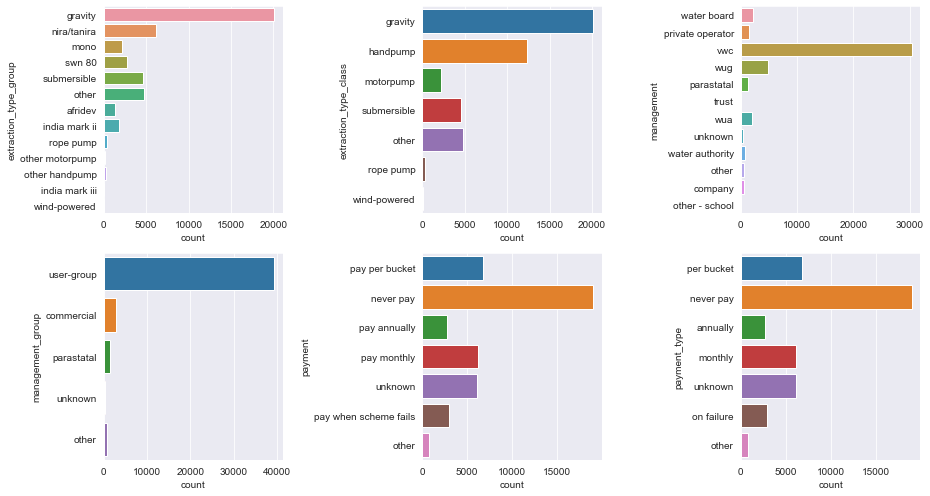

In [13]:
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(13,7))
index=0
ax=ax.flatten()

for i in categ_imp[7:13]:
    sns.countplot(y=i,data=df,ax=ax[index])
    index+=1
    
plt.tight_layout() 


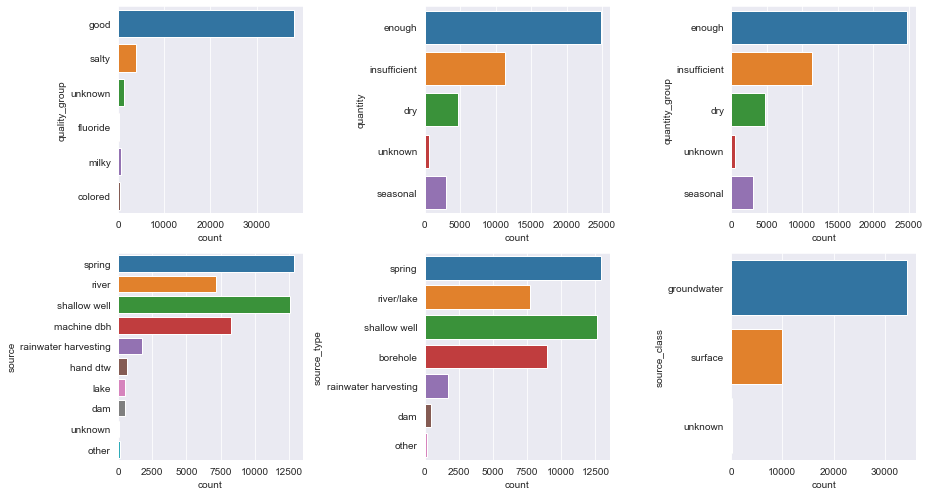

In [14]:
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(13,7))
index=0
ax=ax.flatten()

for i in categ_imp[14:20]:
    sns.countplot(y=i,data=df,ax=ax[index])
    index+=1
    
plt.tight_layout() 


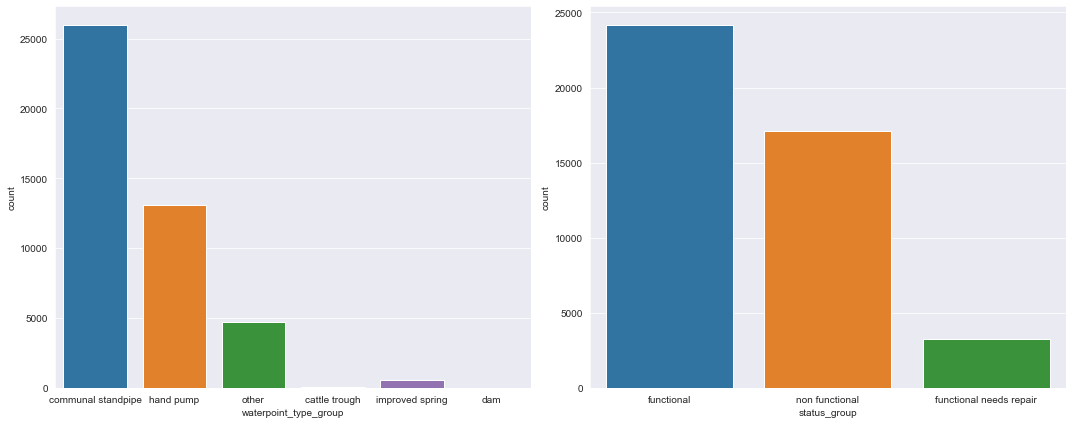

In [15]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
index=0
ax=ax.flatten()

for i in categ_imp[21:23]:
    sns.countplot(x=i,data=df,ax=ax[index])
    index+=1
    
plt.tight_layout() 


***Analyzing the numerical features***

In [16]:
#getting the numerical features
print("total numerical features::",len(numer))
print("---------------------------------")
print(numer)

total numerical features:: 9
---------------------------------
['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year']


<AxesSubplot:>

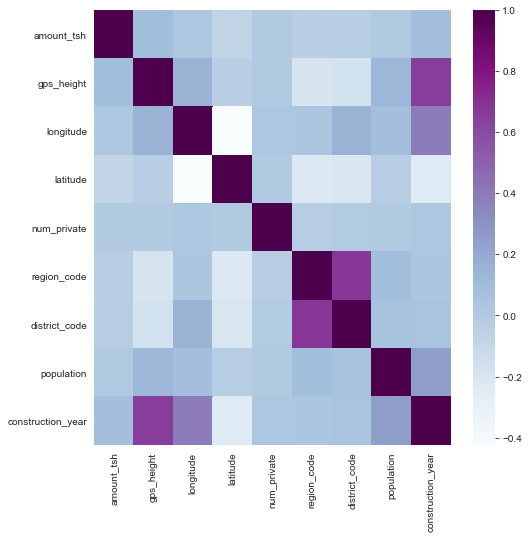

In [17]:
#checking the correlation between the numerical features
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cmap="BuPu")

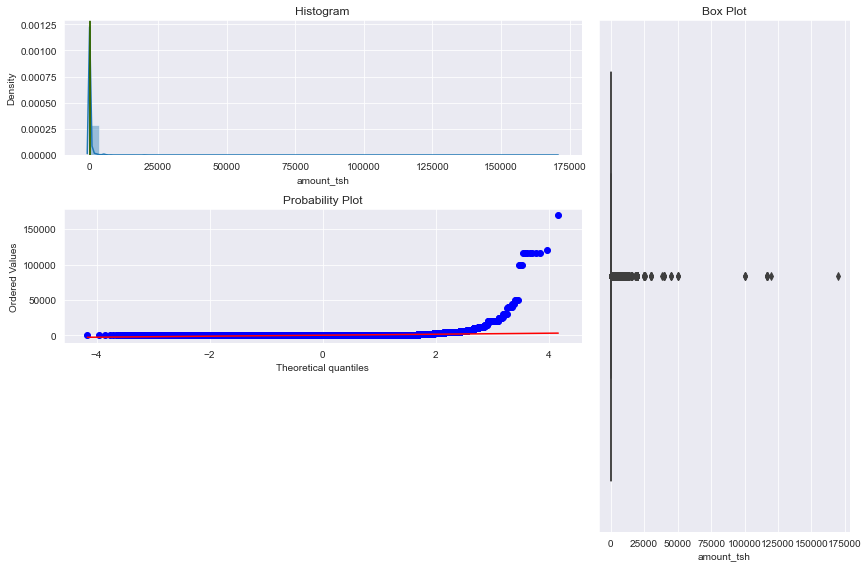

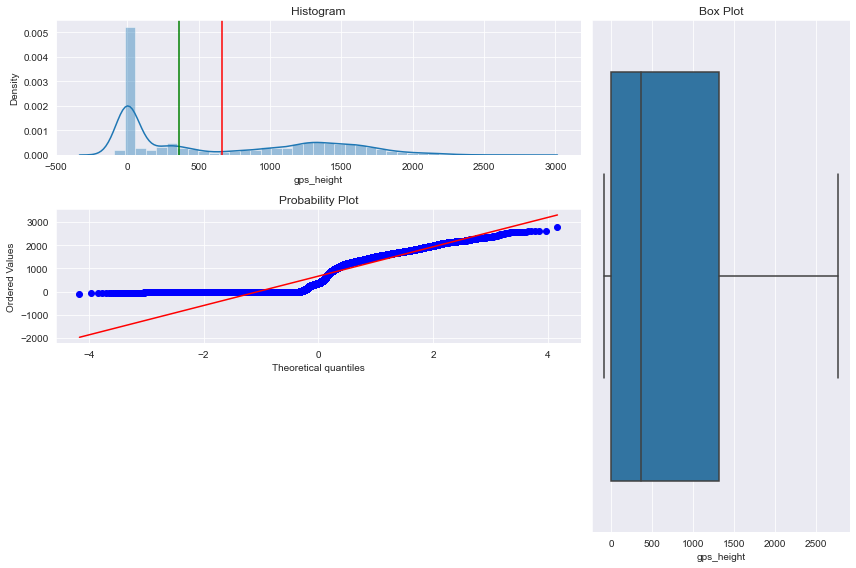

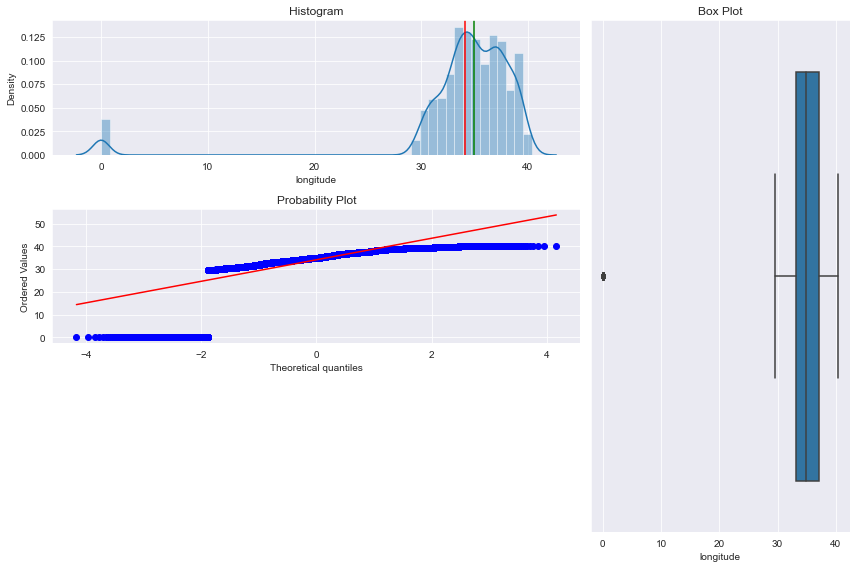

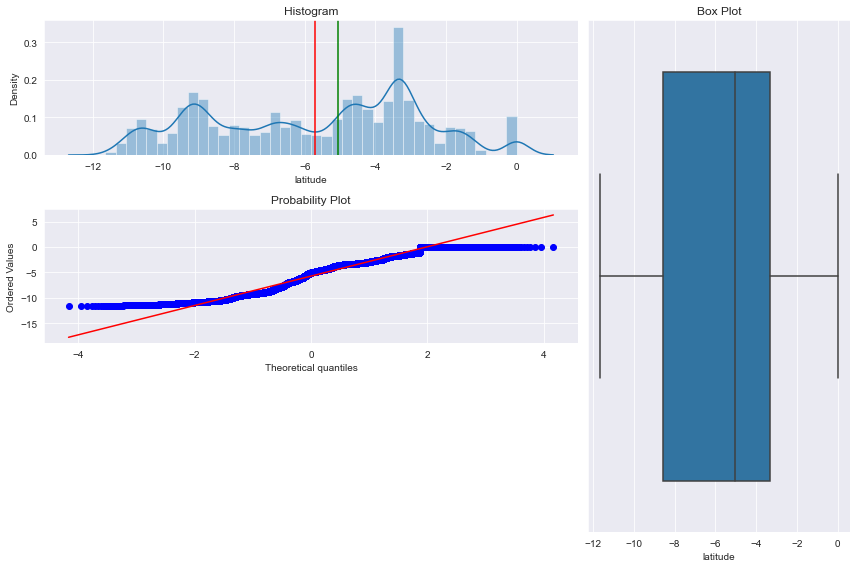

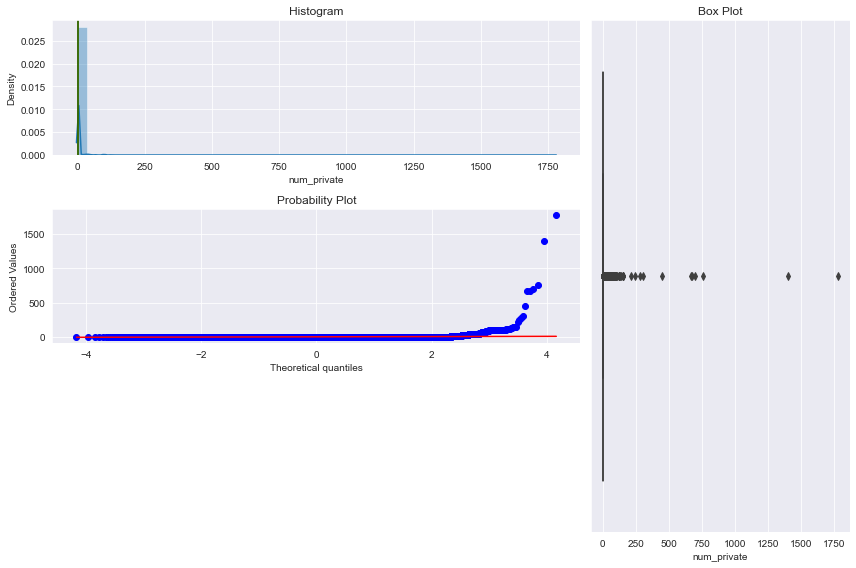

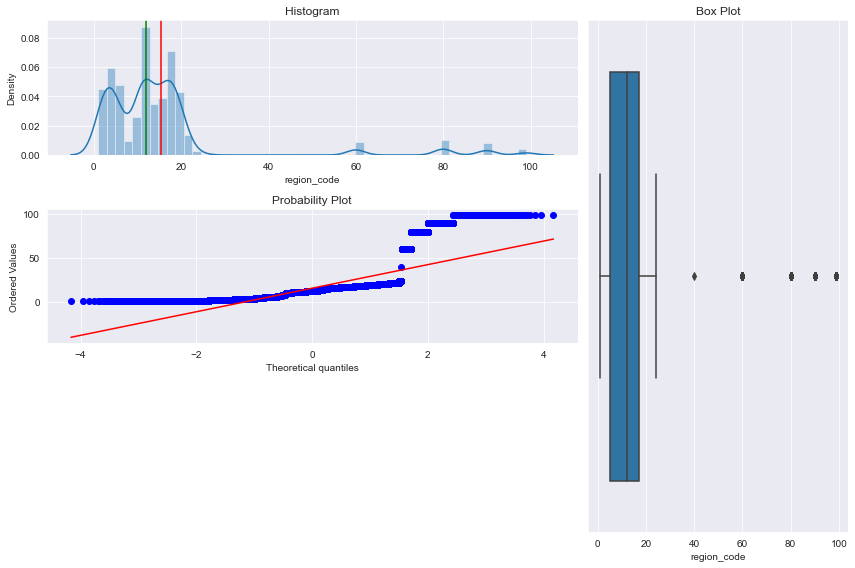

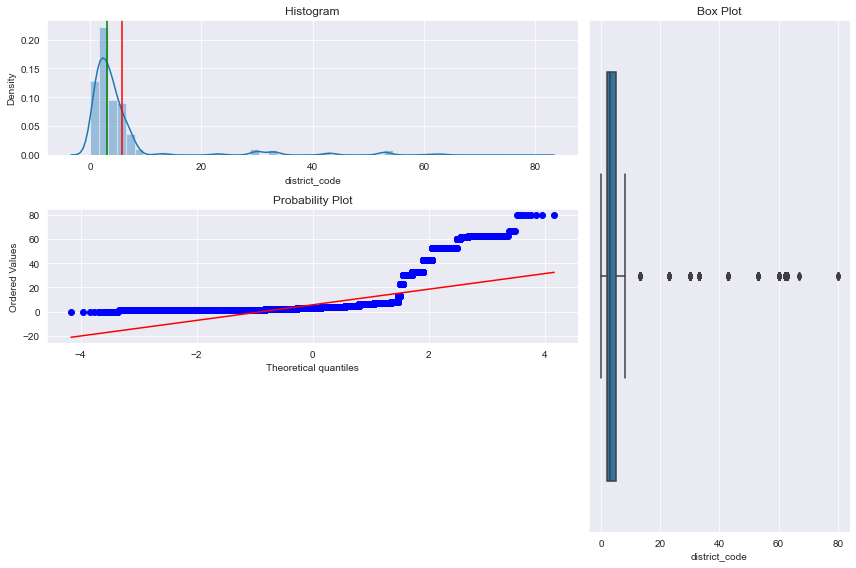

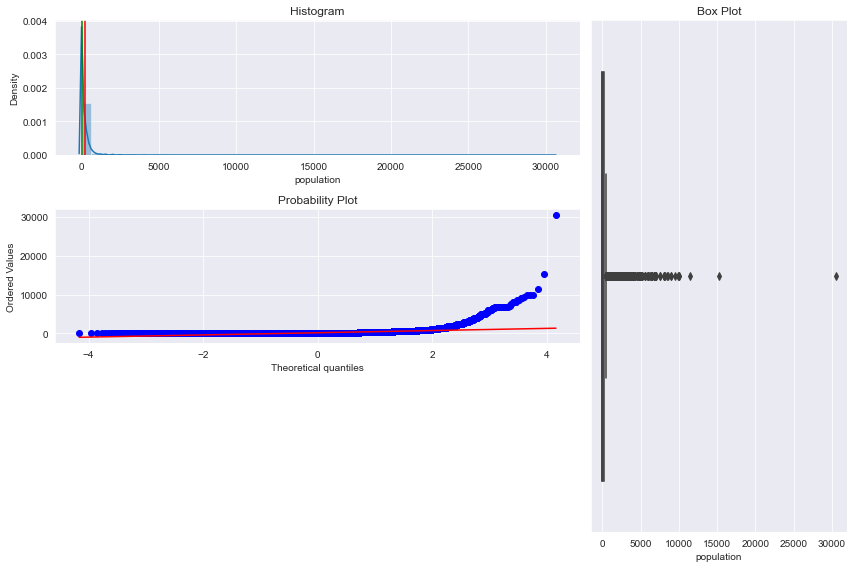

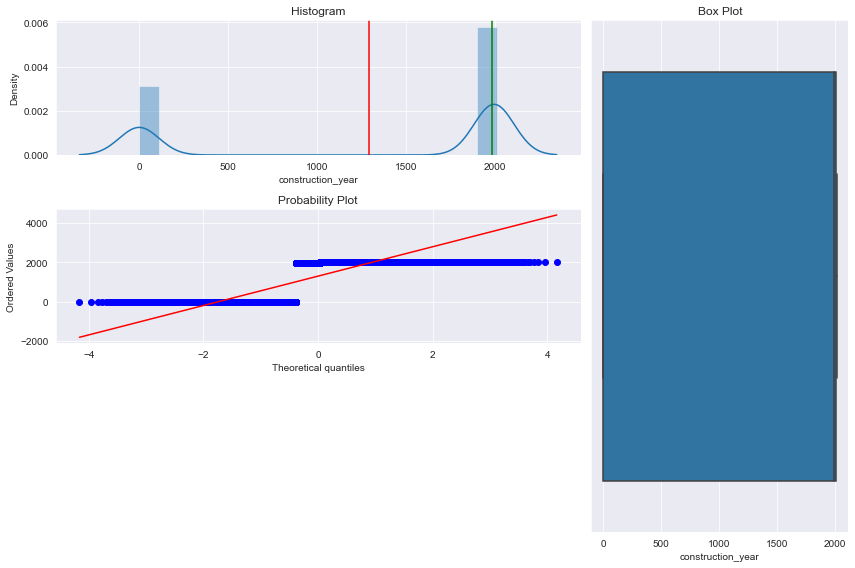

In [18]:
#defining a function for  analysis
import matplotlib.gridspec as gridspec
from scipy import stats

sns.set_style("darkgrid")

def three_chart_plot(df, feature):

    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])

    ## Set title. 
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], ax = ax3 ,orient = 'v')
    
    
    plt.tight_layout()   

#visualizing the numerical variables    
for i in numer:
    three_chart_plot(df,i)    

# Data Preprocessing

***Dealing with the missing values***

[Text(0.5, 0, 'FEATURES'), Text(0, 0.5, 'MISSING VALUE PERCENTAGE')]

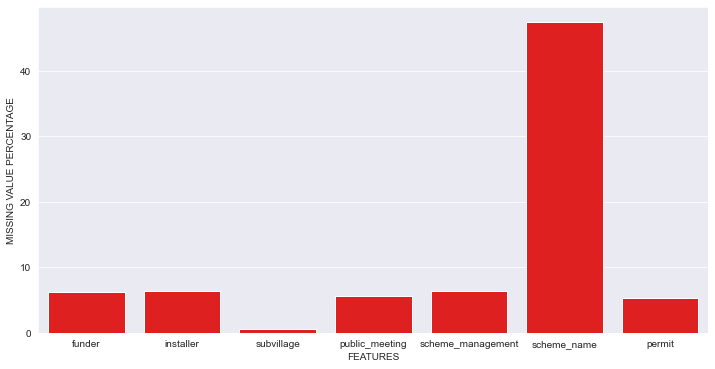

In [19]:
#finding the percentage of missing values and plotting them
feature=[]
percentage_of_missing_values=[]
for i in df.columns:
    if((df[i].isna().sum())>0):
        feature.append(i)
        j=((df[i].isna().sum())/44550)*100
        percentage_of_missing_values.append(j)
plt.figure(figsize=(12,6))
sns.barplot(x=feature,y=percentage_of_missing_values,color="red").set(xlabel='FEATURES', ylabel='MISSING VALUE PERCENTAGE',)

OBSERVATION:: all are categorical variables but the missing values can't be filled with most frequent data. just better to fill it with "unknown".
        scheme_name has too many missing values hence it should be dropped.

In [20]:
#dropping the column with too many missing values
df=df.drop("scheme_name",axis=1)

#imputing the missing values
cols=["funder","installer","subvillage","public_meeting","scheme_management","permit"]
for i in cols:
    df[i]=df[i].fillna(df[i].mode()[0])

#checking
for i in cols:
    print("feature::",i)
    print("missing values:",df[i].isna().sum())
    print("---------------")      

feature:: funder
missing values: 0
---------------
feature:: installer
missing values: 0
---------------
feature:: subvillage
missing values: 0
---------------
feature:: public_meeting
missing values: 0
---------------
feature:: scheme_management
missing values: 0
---------------
feature:: permit
missing values: 0
---------------


missing values are imputed

***Label encoding***

In [21]:
#creating a list of categorical features
categorical_to_encode=[]
for i in df.columns:
    if(df[i].dtype=="object"):
        categorical_to_encode.append(i)

#encoding the remaining categorical columns and checking
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in categorical_to_encode:
    df[i]=le.fit_transform(df[i])
    print("encoded::",i)   

encoded:: date_recorded
encoded:: funder
encoded:: installer
encoded:: wpt_name
encoded:: basin
encoded:: subvillage
encoded:: region
encoded:: lga
encoded:: ward
encoded:: recorded_by
encoded:: scheme_management
encoded:: extraction_type
encoded:: extraction_type_group
encoded:: extraction_type_class
encoded:: management
encoded:: management_group
encoded:: payment
encoded:: payment_type
encoded:: water_quality
encoded:: quality_group
encoded:: quantity
encoded:: quantity_group
encoded:: source
encoded:: source_type
encoded:: source_class
encoded:: waterpoint_type
encoded:: waterpoint_type_group
encoded:: status_group


encoded all the categorical variables

***Dividing the data into input and output***

In [22]:
#input features
x=df.drop("status_group",axis=1)
#target feature
y=df["status_group"]
x.shape,y.shape

((44550, 38), (44550,))

***Scaling the data***

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)  

***Train-test-split***

In [24]:
from sklearn.model_selection import train_test_split

#applying train test split
xtrain,xtest,ytrain,ytest=train_test_split(x,y.values,test_size=0.20,random_state=33)#y.values is used because output must be array

#checking the shapes
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((35640, 38), (8910, 38), (35640,), (8910,))

# Modelling

**Checking for best algorithms using cross validation**

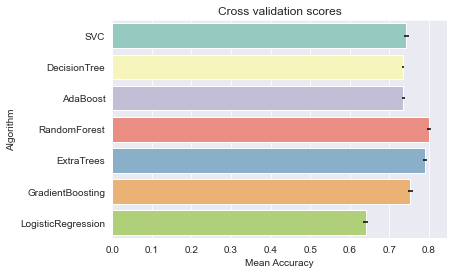

In [25]:
#Importing models and metrics for classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score,StratifiedKFold


#Creating list of all the classifier algorithms
kfold = StratifiedKFold(n_splits=10)
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))


#List of cross validation results
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, xtrain, y = ytrain, scoring = "accuracy", cv = kfold, n_jobs=4))


#Finding the mean of all the folds and modifying the cross validation results
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())


#Creating a dataframe consisting of 3 columns::(crossvalmeans,crossvalerrors and classifiermodels)       
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","LogisticRegression"]})


#Barplot to visualize the best models
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

Randomforest classifier is supposed to be the best fit for the particular dataset although the accuracy is not that good

**Hyperparameter tuning of SVC**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

#SVC
#selecting the hyperparameters to work upon
hyperparameters={'kernel': ['rbf','linear','poly'], 
                  'C': [.1,1, 10, 50, 100,200,300, 1000],
                 'degree':[3,5,8]}

#finding and printing the best parameters
scorer = make_scorer(f1_score, average = 'weighted')
svc=SVC()
svc_gs=GridSearchCV(estimator=svc,param_grid=hyperparameters,scoring=scorer)
svc_gs.fit(xtrain,ytrain)
print("***best parameters***")
print(svc_gs.best_params_)
print("best"+ scoring + ":" + str(svc_gs.best_score_))

#printing the classification report
print("***test classification report***")
ypred=svc_gs.predict(xtest)
print(classification_report(ypred,ytest))

#printing the roc-auc score
#print("***test AUC-ROC***" + str(roc_auc_score(ypred,ytest)))

**Hyperparameter tuning of Extratreesclassifier**

In [ ]:
#ExtraTreesClassfier

#selecting the hyperparameters to work upon
hyperparameters={"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

#finding and printing the best parameters
scorer = make_scorer(f1_score, average = 'weighted')
etc=ExtraTreesClassifier()
etc_gs=GridSearchCV(estimator=etc,param_grid=hyperparameters,scoring=scorer,n_jobs=-1)
etc_gs.fit(xtrain,ytrain)
print("***best parameters***")
print(etc_gs.best_params_)
print("best"+ scoring + ":" + str(etc_gs.best_score_))

#printing the classification report
print("***test classification report***")
ypred=etc_gs.predict(xtest)
print(classification_report(ypred,ytest))

#printing the roc-auc score
#print("***test AUC-ROC***" + roc_auc_score(ypred,ytest))

**Hyperparameter tuning of Randomforest**

In [ ]:
#randomforest
#selecting the hyperparameters to work upon
hyperparameters={"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

#finding and printing the best parameters
scorer = make_scorer(f1_score, average = 'weighted')
rfc=RandomForestClassifier()
rfc_gs=GridSearchCV(estimator=rfc,param_grid=hyperparameters,scoring=scorer,n_jobs=-1)
rfc_gs.fit(xtrain,ytrain)
print("***best parameters***")
print(rfc_gs.best_params_)
print("best"+scoring+":"+str(rfc_gs.best_score_))

#printing the classification report
print("***test classification report***")
ypred=rfc_gs.predict(xtest)
print(classification_report(ypred,ytest))

#printing the roc-auc score
#print("***test AUC-ROC***",str(roc_auc_score(ypred,ytest)))


# Visualizing the most important features

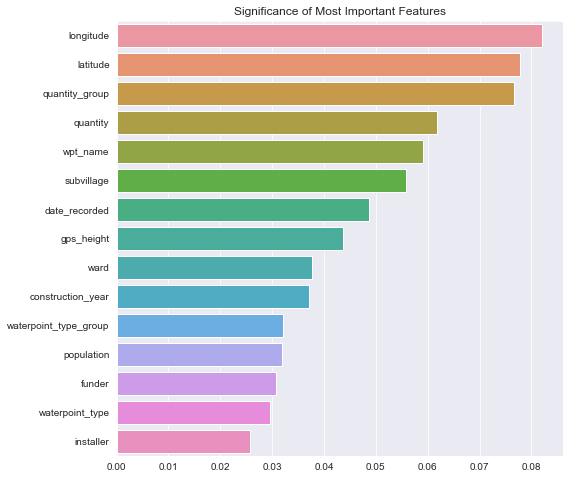

In [65]:
#fitting to randomforestclassifier
rfc=RandomForestClassifier(random_state=2)
model=rfc.fit(xtrain,ytrain)
#visualizing the most important features
feats=np.argsort(rfc.feature_importances_)[-15:]
plt.figure(figsize=(8,8))
sns.barplot(y=df.columns[feats][::-1], 
            x=rfc.feature_importances_[feats][::-1])
plt.title('Significance of Most Important Features');

# Clustering

**t-sne**

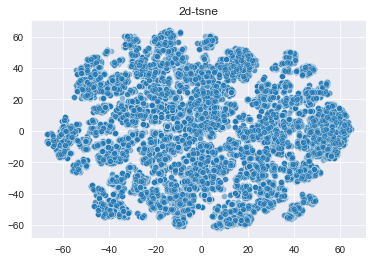

In [29]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,perplexity=100)
tsne_comp=tsne.fit_transform(xtrain)

#trying to visualize the decision boundaries
sns.scatterplot(x=tsne_comp[:,0],y=tsne_comp[:,1],alpha=0.5)
plt.title("2d-tsne")
plt.show()

**Kmeans clustering**

Text(0, 0.5, 'WCSS')

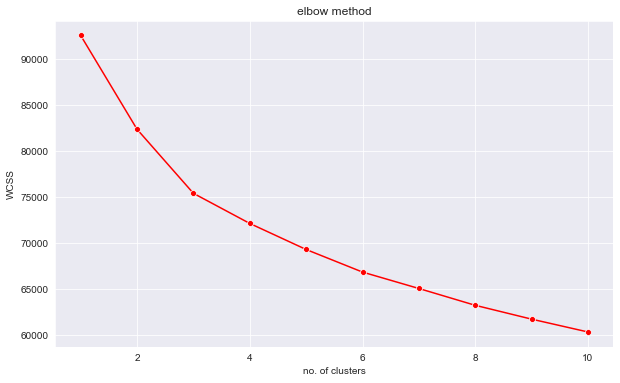

In [32]:
#deciding the optimum number of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(xtrain)
    wcss.append(kmeans.inertia_)
    ##inertia_ is the formula used to segregate the data points into cluster

#Visualizing the elbow method to find the optimal number of clusters
plt.figure(figsize=(10,6))
sns.lineplot(range(1,11),wcss,marker="o",color="red") 
plt.title("elbow method")
plt.xlabel("no. of clusters")
plt.ylabel("WCSS")

optimal no. of clusters= 3

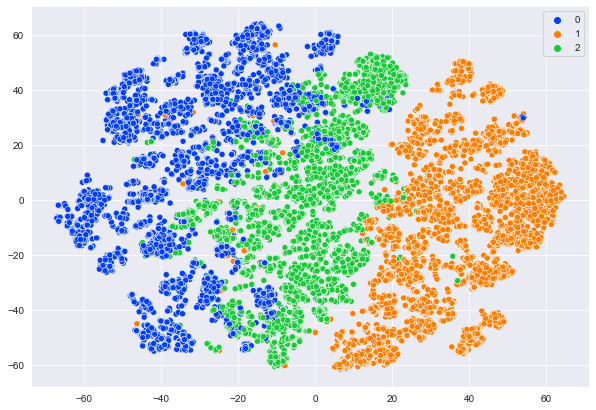

score:: 2.539198985560009


In [53]:
#fitting the kmeans to the datset
from sklearn import metrics

kmeans=KMeans(n_clusters=3,init="k-means++",random_state=0)
labels=kmeans.fit_predict(xtrain)
score=metrics.davies_bouldin_score(xtrain,labels)

#Visualizing the clusters on  tsne components
plt.figure(figsize=(10,7))
sns.scatterplot(x=tsne_comp[:,0],y=tsne_comp[:,1],hue=labels,palette="bright")
plt.show()
print("score::",score)

**Inspirations:**

1. ML for smart monkeys
2. Kaggle 
3. Stack overflow